In [34]:
import os

path = r"C:\Users\User\Desktop\ML\Bd data\Final-Data"

# Check if the directory exists
if os.path.exists(path):
    print("The path is valid.")
else:
    print("The path does not exist. Please check it.")


The path is valid.


In [37]:
import pandas as pd
from glob import glob

# Get all CSV file paths
path = r"C:\Users\User\Desktop\ML\Bd data\Final-Data"
file_paths = glob(path + "\\*.csv")

# Check if each file contains data
for file in file_paths:
    try:
        data = pd.read_csv(file)
        if data.empty:
            print(f"{file} is empty.")
        else:
            print(f"{file} contains {len(data)} rows and {len(data.columns)} columns.")
    except Exception as e:
        print(f"Error reading {file}: {e}")


C:\Users\User\AppData\Local\Temp\ipykernel_9580\1208480103.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\User\AppData\Local\Temp\ipykernel_9580\1208480103.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


C:\Users\User\Desktop\ML\Bd data\Final-Data\Barisal.csv contains 43419 rows and 16 columns.
C:\Users\User\Desktop\ML\Bd data\Final-Data\Chandpur.csv contains 31484 rows and 16 columns.
C:\Users\User\Desktop\ML\Bd data\Final-Data\Comilla.csv contains 31945 rows and 16 columns.
C:\Users\User\Desktop\ML\Bd data\Final-Data\Dhaka.csv contains 44042 rows and 16 columns.
C:\Users\User\Desktop\ML\Bd data\Final-Data\Faridpur.csv contains 31887 rows and 16 columns.
C:\Users\User\Desktop\ML\Bd data\Final-Data\Khulna.csv contains 32178 rows and 16 columns.
C:\Users\User\Desktop\ML\Bd data\Final-Data\Madaripur.csv contains 30470 rows and 16 columns.
C:\Users\User\Desktop\ML\Bd data\Final-Data\Tangail.csv contains 31788 rows and 16 columns.


In [39]:
import pandas as pd
from glob import glob

# Path to your station CSV files
path = r"C:\Users\User\Desktop\ML\Bd data\Final-Data"

# Get all CSV file paths in the directory
file_paths = glob(path + "\\*.csv")

# Combine all station data
combined_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Save the combined DataFrame to a single CSV file


C:\Users\User\AppData\Local\Temp\ipykernel_9580\541547863.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9580\541547863.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)


In [56]:
combined_data.info()
data=combined_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277213 entries, 0 to 277212
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date-Time          277213 non-null  object
 1   Date ∇             277213 non-null  object
 2   UTC time           277213 non-null  object
 3   Temp. (ºC)         276728 non-null  object
 4   Rel. Hum. (%)      276851 non-null  object
 5   Pressure/ Geopot.  277208 non-null  object
 6   Wind dir           277206 non-null  object
 7   Wins speed (Km/h)  210760 non-null  object
 8   Clouds             275483 non-null  object
 9   Low clouds         275478 non-null  object
 10  Medium clouds      275427 non-null  object
 11  High clouds        228290 non-null  object
 12  Prec. (mm)         277213 non-null  object
 13  Max temp. (ºC)     277213 non-null  object
 14  Min temp. (ºC)     277213 non-null  object
 15  Conditions         277213 non-null  object
dtypes: object(16)
memory

In [66]:
import pandas as pd
from glob import glob

# Load each file and assign StationID based on file name
path = r"C:\Users\User\Desktop\ML\Bd data\Final-Data"
file_paths = glob(path + "\\*.csv")

combined_data = []

for file in file_paths:
    station_name = file.split('\\')[-1].replace('.csv', '')  # Extract station name from file name
    data = pd.read_csv(file)
    data['StationID'] = station_name  # Assign station ID
    combined_data.append(data)

# Combine all data into a single DataFrame
final_data = pd.concat(combined_data, ignore_index=True)


C:\Users\User\AppData\Local\Temp\ipykernel_9580\555452576.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\User\AppData\Local\Temp\ipykernel_9580\555452576.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\User\AppData\Local\Temp\ipykernel_9580\555452576.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


In [67]:
def MinMaxNorm(x, min_val, max_val):
    return (x - min_val) / (max_val - min_val)

def MeanStdNorm(x, mean, std):
    return (x - mean) / std


In [68]:
numerical_cols = ['Temp. (ºC)', 'Rel. Hum. (%)', 'Pressure/ Geopot.', 'Wins speed (Km/h)', 'Prec. (mm)']

# Replace non-numeric values and missing data with NaN, then handle NaN
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')
data.fillna(data[numerical_cols].mean(), inplace=True)

# Min-Max Normalization
feature_min = data[numerical_cols].min()
feature_max = data[numerical_cols].max()
normalized_features = data[numerical_cols].apply(lambda x: MinMaxNorm(x, feature_min[x.name], feature_max[x.name]))


In [69]:
data.columns

Index(['Date-Time', 'Date ∇', 'UTC time', 'Temp. (ºC)', 'Rel. Hum. (%)',
       'Pressure/ Geopot.', 'Wind dir', 'Wins speed (Km/h)', 'Clouds',
       'Low clouds', 'Medium clouds', 'High clouds', 'Prec. (mm)',
       'Max temp. (ºC)', 'Min temp. (ºC)', 'Conditions', 'StationID'],
      dtype='object')

In [70]:
# Full mapping of station IDs to their respective longitude and latitude
location_mapping = {
    "Barisal": [90.3667, 22.7000],
    "Chandpur": [90.3667, 23.2333],
    "Comilla": [91.1809, 23.4607],
    "Dhaka": [90.4125, 23.8103],
    "Faridpur": [89.8316, 23.6011],
    "Khulna": [89.5588, 22.8456],
    "Madaripur": [90.2179, 23.1644],
    "Tangail": [89.9250, 24.2498]
}

# Apply the mapping to add Longitude and Latitude columns
data['Longitude'] = data['StationID'].map(lambda x: location_mapping[x][0])
data['Latitude'] = data['StationID'].map(lambda x: location_mapping[x][1])


In [71]:
from scipy.spatial.distance import cdist

# Extract longitude and latitude
locations = data[['Longitude', 'Latitude']].drop_duplicates().to_numpy()

# Calculate pairwise distances between stations
distances = cdist(locations, locations)

# Define a distance threshold for connecting nodes
threshold = 100  # Example: 100 km
edges = np.argwhere(distances < threshold)


In [72]:

correlation_matrix = np.corrcoef(normalized_features.T)

# Define a threshold for correlation
threshold = 0.4
edges = np.argwhere(correlation_matrix > threshold)


In [77]:
import torch


from torch_geometric.data import Data

# Convert edges to PyTorch tensor
edge_index = torch.tensor(edges.T, dtype=torch.long)

# Convert normalized features to tensor
node_features = torch.tensor(normalized_features.to_numpy(), dtype=torch.float)

# Create a PyTorch Geometric Data object
graph_data = Data(x=node_features, edge_index=edge_index)

print(graph_data)


Data(x=[31788, 5], edge_index=[2, 3])


In [80]:
import networkx as nx
import matplotlib.pyplot as plt
import torch


In [81]:
from torch_geometric.utils import to_networkx

# Assuming your graph data is in `graph_data`
# Convert PyTorch Geometric graph to NetworkX graph
nx_graph = to_networkx(graph_data, to_undirected=True)


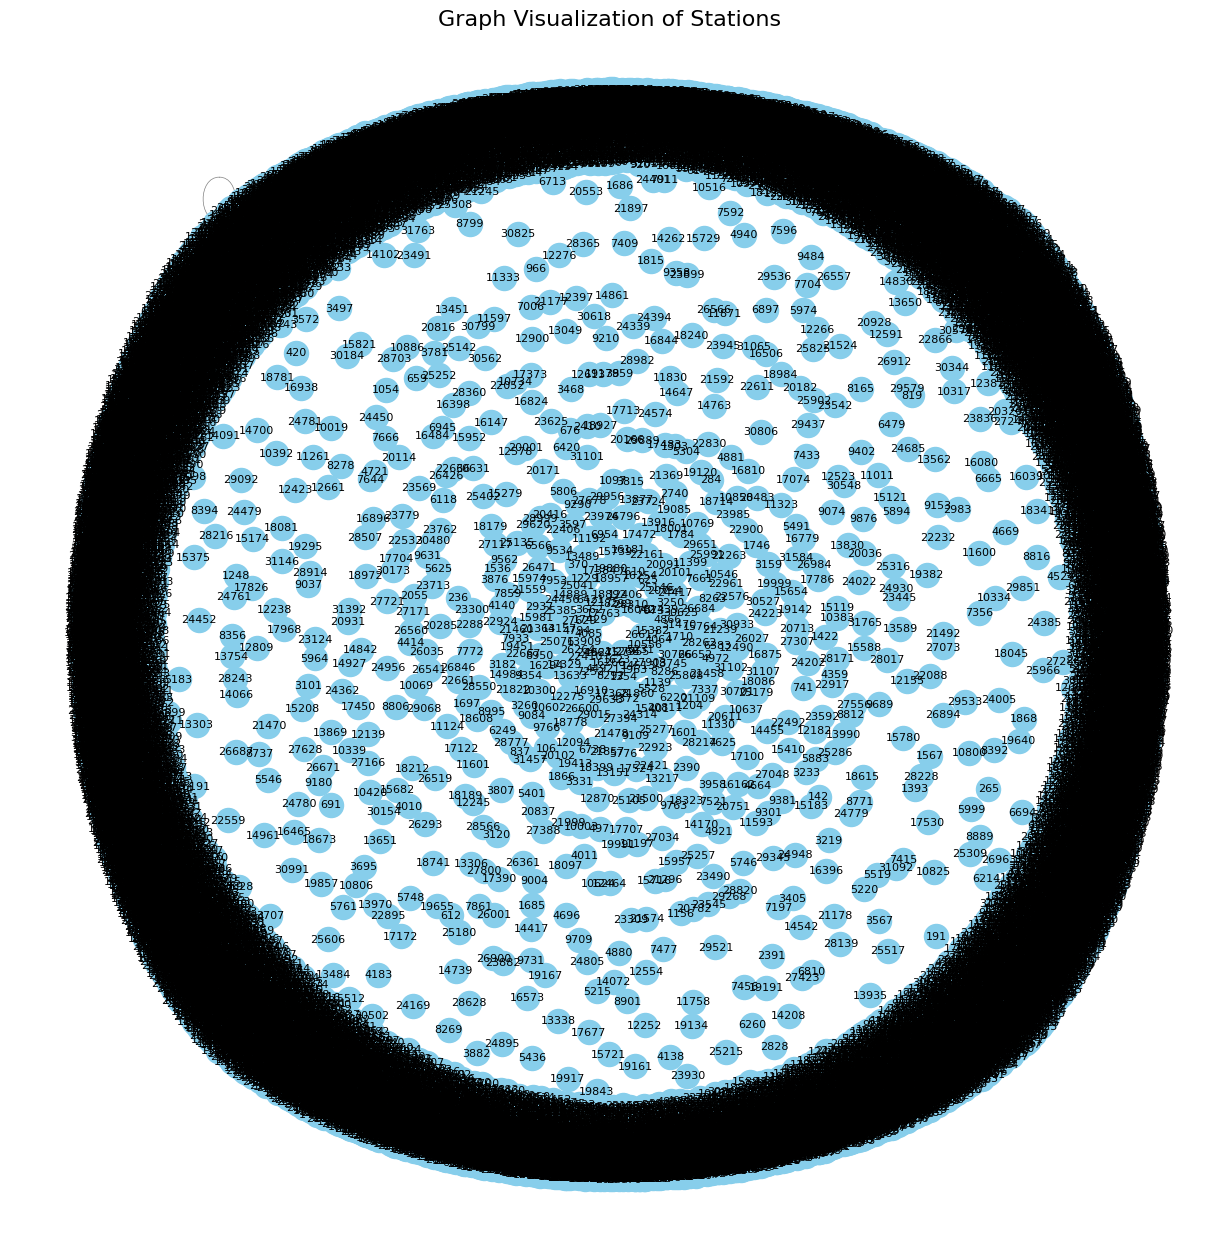

In [82]:

# Plot the NetworkX graph
plt.figure(figsize=(12, 12))  # Set the figure size
pos = nx.spring_layout(nx_graph)  # Define layout (spring layout for aesthetic spacing)

# Draw nodes and edges
nx.draw(
    nx_graph,
    pos,
    with_labels=True,
    node_size=300,
    node_color="skyblue",
    font_size=8,
    font_color="black",
    edge_color="gray",
    width=0.5
)

plt.title("Graph Visualization of Stations", fontsize=16)
plt.show()


In [10]:
import geopandas as gpd

# Path to the extracted shapefile
path_to_shapefile = r"C:\Users\User\Desktop\ML\Bd data\Final-Data"

# Load the world shapefile
world = gpd.read_file(path_to_shapefile)

# Verify the data
print(world.head())


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

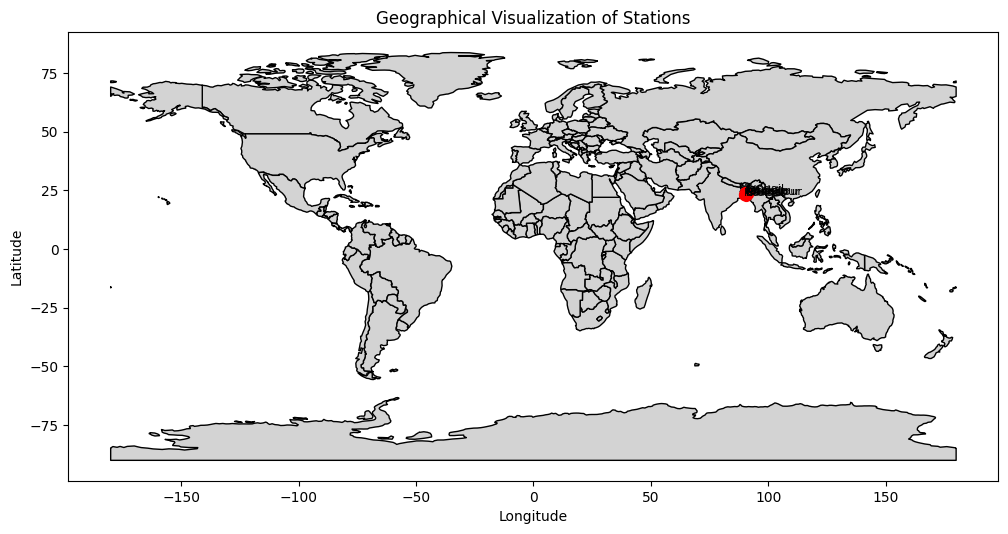

In [11]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Example stations DataFrame
import pandas as pd
stations = pd.DataFrame({
    'StationID': ['Barisal', 'Chandpur', 'Comilla', 'Dhaka', 'Faridpur', 'Khulna', 'Madaripur', 'Tangail'],
    'Longitude': [90.3667, 90.3667, 91.1809, 90.4125, 89.8316, 89.5588, 90.2179, 89.9250],
    'Latitude': [22.7000, 23.2333, 23.4607, 23.8103, 23.6011, 22.8456, 23.1644, 24.2498]
})

stations['geometry'] = stations.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
stations_gdf = gpd.GeoDataFrame(stations, geometry='geometry')

# Plot world boundaries and stations
fig, ax = plt.subplots(figsize=(12, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')  # Background map
stations_gdf.plot(ax=ax, color='red', markersize=50)  # Stations

# Add station labels
for x, y, label in zip(stations['Longitude'], stations['Latitude'], stations['StationID']):
    ax.text(x + 0.1, y, label, fontsize=8)

plt.title("Geographical Visualization of Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


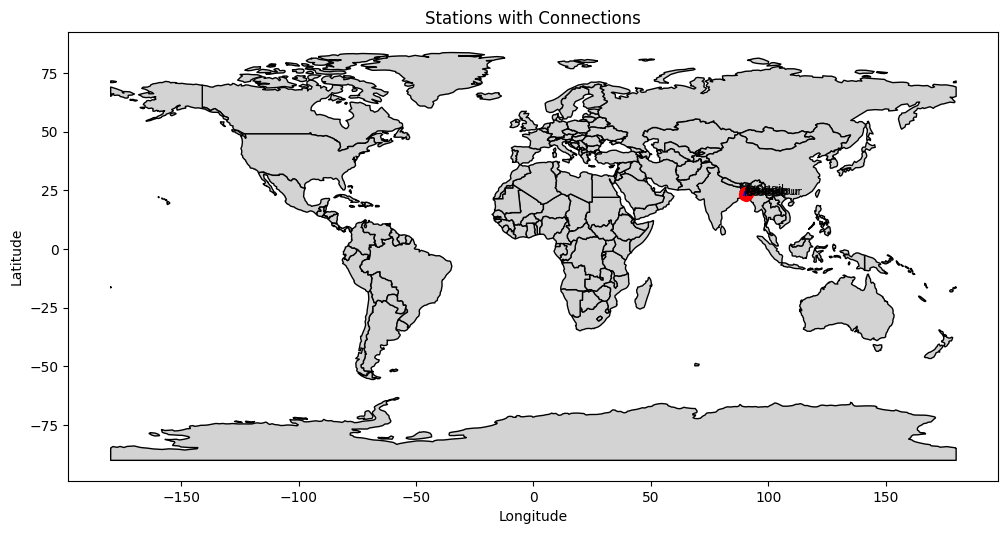

In [12]:
# Example edges
edges = [
    ('Barisal', 'Dhaka'),
    ('Dhaka', 'Comilla'),
    ('Khulna', 'Faridpur'),
    ('Madaripur', 'Tangail')
]

# Draw edges
fig, ax = plt.subplots(figsize=(12, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')  # Background map
stations_gdf.plot(ax=ax, color='red', markersize=50)  # Stations

for start, end in edges:
    start_point = stations_gdf.loc[stations_gdf['StationID'] == start].geometry.values[0]
    end_point = stations_gdf.loc[stations_gdf['StationID'] == end].geometry.values[0]
    x_coords, y_coords = [start_point.x, end_point.x], [start_point.y, end_point.y]
    ax.plot(x_coords, y_coords, color='blue', linewidth=1)  # Draw connection

# Add station labels
for x, y, label in zip(stations['Longitude'], stations['Latitude'], stations['StationID']):
    ax.text(x + 0.1, y, label, fontsize=8)

plt.title("Stations with Connections")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [13]:
bangladesh = world[world['ADMIN'] == 'Bangladesh']


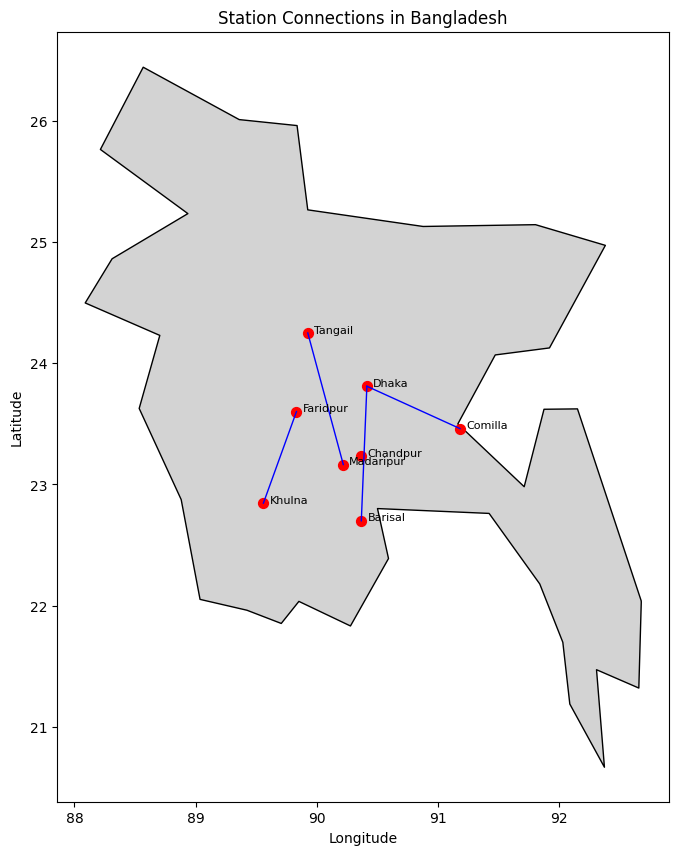

In [14]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Stations within Bangladesh (example coordinates)
stations_bd = pd.DataFrame({
    'StationID': ['Barisal', 'Chandpur', 'Comilla', 'Dhaka', 'Faridpur', 'Khulna', 'Madaripur', 'Tangail'],
    'Longitude': [90.3667, 90.3667, 91.1809, 90.4125, 89.8316, 89.5588, 90.2179, 89.9250],
    'Latitude': [22.7000, 23.2333, 23.4607, 23.8103, 23.6011, 22.8456, 23.1644, 24.2498]
})

stations_bd['geometry'] = stations_bd.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
stations_gdf_bd = gpd.GeoDataFrame(stations_bd, geometry='geometry')

# Connections (edges) between stations
edges_bd = [
    ('Barisal', 'Dhaka'),
    ('Dhaka', 'Comilla'),
    ('Khulna', 'Faridpur'),
    ('Madaripur', 'Tangail')
]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
bangladesh.plot(ax=ax, color='lightgrey', edgecolor='black')  # Background map of Bangladesh
stations_gdf_bd.plot(ax=ax, color='red', markersize=50)  # Station locations

# Add edges (connections)
for start, end in edges_bd:
    start_point = stations_gdf_bd.loc[stations_gdf_bd['StationID'] == start].geometry.values[0]
    end_point = stations_gdf_bd.loc[stations_gdf_bd['StationID'] == end].geometry.values[0]
    x_coords, y_coords = [start_point.x, end_point.x], [start_point.y, end_point.y]
    ax.plot(x_coords, y_coords, color='blue', linewidth=1)

# Add station labels
for x, y, label in zip(stations_bd['Longitude'], stations_bd['Latitude'], stations_bd['StationID']):
    ax.text(x + 0.05, y, label, fontsize=8)

plt.title("Station Connections in Bangladesh")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [16]:
import folium

# Create a map centered around Bangladesh
m = folium.Map(location=[23.684994, 90.356331], zoom_start=7)  # Centered on Bangladesh

# Add station markers
stations = [
    {"name": "Barisal", "lat": 22.7000, "lon": 90.3667},
    {"name": "Chandpur", "lat": 23.2333, "lon": 90.3667},
    {"name": "Comilla", "lat": 23.4607, "lon": 91.1809},
    {"name": "Dhaka", "lat": 23.8103, "lon": 90.4125},
    {"name": "Faridpur", "lat": 23.6011, "lon": 89.8316},
    {"name": "Khulna", "lat": 22.8456, "lon": 89.5588},
    {"name": "Madaripur", "lat": 23.1644, "lon": 90.2179},
    {"name": "Tangail", "lat": 24.2498, "lon": 89.9250},
]

for station in stations:
    folium.Marker(
        location=[station["lat"], station["lon"]],
        popup=station["name"],
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

# Add connections (edges) as lines
edges = [
    ("Barisal", "Dhaka"),
    ("Dhaka", "Comilla"),
    ("Khulna", "Faridpur"),
    ("Madaripur", "Tangail"),
]

station_coords = {station["name"]: (station["lat"], station["lon"]) for station in stations}

for start, end in edges:
    folium.PolyLine(
        locations=[station_coords[start], station_coords[end]],
        color="blue",
        weight=2.5,
        opacity=1
    ).add_to(m)

# Save the map to an HTML file and open it in your browser
m.save("stations_map_bd.html")
